In [25]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Getting the data

In [16]:
housing = pd.read_csv("/home/jupyter/hands-on-ml/data/housing.csv")

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5,3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5])

In [18]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    start_train_data = housing.loc[train_index]
    start_test_data = housing.loc[test_index]

In [19]:
for set_ in (start_train_data, start_test_data):
    set_.drop("income_cat", axis=1, inplace=True)

## Visualizing Geographical Data

In [20]:
# We should avoid seeing test data. So, make a copy of the training dataset
housing = start_train_data.copy()

In the following plot we will be able to see the high-density areas.

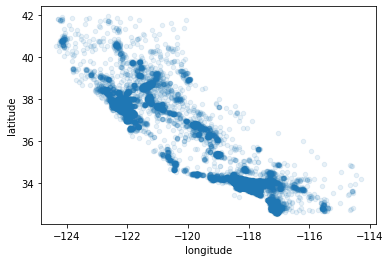

In [23]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

Let's look at housing price. The radius of each circle represents the distric's population(option s) and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices).

In [ ]:
housing.plot(kind='scatter',
             x='longitude',
             y='latitude',
             alpha=0.4,
             s=housing['population']/100,
             
             figsize = (10,7),
             c='median_house_value',
             cmap=plt.get_cmap('jet'),
             colorbar=True)
plt.legend()